# <font color='firebrick'>Problem Set \#1:</font> Due by 11:59 EDT Sunday, October 16, 2022

The **objective** of this notebook is to work on our python programming skills. It is not my intention that you become programming experts but proficiency will be important when we start working with larger data sets and more complicated models. The more interesting aspects of this notebook (yes, I know coding can be boring but it's also an amazing tool) are that 

* You will download financial data to train a model to forecast US GDP.
<br>

* You are going to pretend like we're doing this in December 2019 to train our forecasting model.
<br>

* You will then compare the forecast to what happened in the pandemic. Think of this as an extreme event (ie, a black swan) which our model could not have foreseen. This is like something in the testing data which is very different than the training data. Thus, the pandemic serves as an extreme, real-life example of over-fitting.

Complete this problem set by answering the questions below. This notebook will be your workspace so add cells as you please. Make sure you understand the material in the lecture notebooks (bias-variance tradeoff and forecasting) as well the notebooks covering APIs and working with timeseries data before beginning this notebook.

When you are finished, submit your completed <font color='brown'>**Jupyter Notebook**</font> as a pdf. [To save as a pdf: From the file menu, choose 'print preview'. A new tab will open with the notebook presented as html. Print as a pdf.] Save your pdf notebook with the naming conention **'PS1_[insert last name]'**. For example, 'PS1_Thurk.pdf'.

**Grading:** The problem set is worth **40 points** and partial credit is indicated for each exercise.

**A reminder:** My office hours are Wednesdays 3:00PM-5:00PM EDT in my office (B422 Amos) and Friday 11:00AM-12:00PM EDT via Zoom (see syllabus for link). 

*You should feel free to work on this with classmates but you must submit your own solutions.*

# Name: <font color= red>Daniel Saul</font>

# Exercise: Forecasting U.S. GDP growth

In this exercise, we will forecast the growth rate of U.S. GDP for the 9 quarters after December 2019. Some economists believe that the U.S. economy will enter a recession by the end of 2020:
* According to a survey conducted by the National Association for Business Economists, two-thirds of the economists surveyed believed the U.S. would enter a recession by the end of 2020. [(Source)](https://apnews.com/5df2300faa8a4f74b9b0f3ae2b6c64aa)
* In June 2018, former Federal Reserve Chairman Ben Bernanke said "\[The stimulus\] is going to hit the economy in a big way this year and next year, and then in 2020 Wile E. Coyote is going to go off the cliff." [(Source)](https://www.bloomberg.com/news/articles/2018-06-07/bernanke-says-u-s-economy-faces-wile-e-coyote-moment-in-2020)

No one thought a global pandemic was about to occur.

You will develop an OLS autoregressive model with other indicators that are predictive of GDP growth to the model. Follow the instructions below to create the forecast.

## Part (a): Importing and preparing the data <font color=brown>[10 Points]</font>

1. Use `pandas_datareader` and the FRED API to import the following variables into a Pandas dataframe. See the API lecture notebook to see how to do this. **Set the start date as January 1, 1980.**

    * Real GDP growth rate (quarterly): code 'A191RL1Q225SBEA'
    * Unemployment rate (monthly): code 'UNRATE'
    * Consumer price index (monthly): code 'CPIAUCSL'
    * New housing starts (monthly): code 'HOUST'
    
Use `pip` to install datareader:

```python
pip install pandas-datareader
```

Once the data are imported: 

* Give these variables more reasonable names. 
* Resample the data to the quarterly frequency using the `resample()` method for the DataFrame you created. Nb, your index has to be a `datetime` object (i.e., dates that are in `datetime`). See the Timeseries notebook to see how to do these things.
* Create a variable containing the inflation rate, calculated as the percentage change (i.e., `.pct_change()`) in the consumer price index. 
* Print the last 5 rows of the resulting dataframe.

In [117]:
from pandas_datareader import data, wb
import pandas as pd                     
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt  

# import variables into dataframe
codes = ['A191RL1Q225SBEA', 'UNRATE', 'CPIAUCSL', 'HOUST']

# set start date
start = dt.datetime(1980, 1, 1)
fred = data.DataReader(codes, 'fred', start)

# give variables more reasonable names
fred.columns = ['gdp', 'unemp_rate', 'cpi', 'housing_starts']

# resample data
fred_q = fred.resample('q').mean()

# create inflation rate variable
fred_q['inf_rate'] = fred_q['cpi'].pct_change() * 100

# print last five rows
fred_q.tail()

,gdp,unemp_rate,cpi,housing_starts,inf_rate
DATE,,,,,
2021-09-30,2.7,5.100000,273.163333,1569.333333,1.638263
2021-12-31,7.0,4.233333,278.413333,1679.000000,1.921927
2022-03-31,-1.6,3.800000,284.607667,1719.666667,2.224869
2022-06-30,-0.6,3.600000,291.821667,1647.333333,2.534717
2022-09-30,NaN,3.566667,295.884000,1489.500000,1.392060


2. Use the module `yfinance` to download values for the historical S&P index (ticker: "^GSPC"). Use the same time-period as you did with the FRED data. You will have to download the package via `pip`:

```python
pip install yfinance
```

Once you have the data downloaded in DataFrame:
* Set the dates as the index. 
* Resample to the quarterly level. 
* Create a new column containing the quarterly growth rate of the S&P 500. 
* Print the last 5 rows of the resulting data frame.

In [118]:
import yfinance as yf

# set the date as the index with same fred period
start = dt.datetime(1980, 1, 1)

# read in data
ticker = ['^GSPC']
sp500 = yf.download(ticker, start)

# resample data to quarterly
sp500 = sp500.resample('q').mean()

# new column with quarterly growth rate
sp500['sp_growth'] = sp500['Adj Close'].pct_change()

# print last five rows
sp500.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,sp_growth
Date,,,,,,,
2021-12-31 00:00:00-05:00,4597.917496,4623.372498,4576.220802,4602.108894,4602.108894,3.095240e+09,0.040827
2022-03-31 00:00:00-04:00,4466.721467,4502.618353,4420.908558,4463.855477,4463.855477,3.990735e+09,-0.030041
2022-06-30 00:00:00-04:00,4113.999980,4150.028234,4065.782238,4105.667102,4105.667102,4.043743e+09,-0.080242
2022-09-30 00:00:00-04:00,3980.039978,4010.650932,3947.563587,3980.351112,3980.351112,3.756595e+09,-0.030523
2022-12-31 00:00:00-05:00,3661.318018,3710.042969,3621.566992,3666.805981,3666.805981,4.323679e+09,-0.078773


3. Now merge the two data frames created above. Keep only the columns associated with the GDP growth rate, the unemployment rate, the inflation rate, new housing starts, and the S&P 500 growth rate. Print the last 5 rows of the data frame.

In [119]:
# changing index to align fred data for merging
sp500 = sp500.set_index(pd.to_datetime(sp500.index.strftime('%Y-%m-%d')))
fred_q.index.names = ['Date']

# merge two data frames and keep certain columns
merged_data = fred_q.merge(sp500, on='Date')
merged_data = merged_data[['gdp', 'unemp_rate', 'inf_rate', 'housing_starts', 'sp_growth']]

# print last five rows
merged_data.tail()

,gdp,unemp_rate,inf_rate,housing_starts,sp_growth
Date,,,,,
2021-09-30,2.7,5.100000,1.638263,1569.333333,0.056879
2021-12-31,7.0,4.233333,1.921927,1679.000000,0.040827
2022-03-31,-1.6,3.800000,2.224869,1719.666667,-0.030041
2022-06-30,-0.6,3.600000,2.534717,1647.333333,-0.080242
2022-09-30,NaN,3.566667,1.392060,1489.500000,-0.030523


## Part (b): The model and creating lagged and forward values <font color=brown>[10 Points]</font>

Our goal is to forecast the growth rate of GDP $h$ quarters into the future, for $h=1,2,\dots,9$. Do do so we will run a separate regression for each forecast horizon, and then use the most recent values of the data (i.e., the values for the third quarter of 2018) to create the predicted value of GDP growth for each $h$.

In particular, we will use the model

$$
\begin{align}
gGDP_{t+h} = & \rho^h_0 + \rho^h_1 gGDP_t + \rho^h_2 gGDP_{t-1} + \rho^h_3 unemp_t + \rho^h_4 unemp_{t-1} \\
             & \\
             & + \rho^h_5 inflation_t + \rho^h_6 inflation_{t-1} + \rho^h_7 housing_t + \rho^h_8 housing_{t-1} \\
             & \\
             & + \rho^h_9 gSP500_t + \rho^h_{10} gSP500_{t-1} + \varepsilon_{t+h} \\
\end{align}
$$

where $gGDP_t$ is the GDP growth rate in quarter $t$, $unemp_t$ is the unemployment rate, $inflation_t$ is the inflation rate, $housing_t$ is the number of new housing starts, and $gSP500_t$ is the growth rate of the S&P 500. Note that the parameters are indexed by $h$, meaning that their values will be different for different forecast horizons.

Follow the instructions below.

1. Before estimating the model, create new columns that contain the lagged values of the explanatory variables: $gGDP_{t-1}, umep_{t-1}, inflation_{t-1}, housing_{t-1}$, and $gSP500_{t-1}$. Use the `.shift()` method.


2. We also need to create columns that contain the **forward** values of GDP growth, as these will be our dependent variables (i.e., $gGDP_{t+h}$ for $h=1,2,\dots,9$). You can either do this manually or write a loop. Name these columns 'F1gdp', 'F2gdp', etc. Again, use the `.shift()` method. Print the last 5 rows of the resulting dataframe.

In [120]:
# create new columns that contain lagged values
merged_data['gGDP_lag'] = merged_data.gdp.shift(1)
merged_data['unemp_lag'] = merged_data.unemp_rate.shift(1)
merged_data['inflation_lag'] = merged_data.inf_rate.shift(1)
merged_data['housing_lag'] = merged_data.housing_starts.shift(1)
merged_data['gSP500_lag'] = merged_data.sp_growth.shift(1)

# create columns that contain the forward values
merged_data['F1gdp'] = merged_data['gdp'].shift(-1)
merged_data['F2gdp'] = merged_data['gdp'].shift(-2)
merged_data['F3gdp'] = merged_data['gdp'].shift(-3)
merged_data['F4gdp'] = merged_data['gdp'].shift(-4)
merged_data['F5gdp'] = merged_data['gdp'].shift(-5)
merged_data['F6gdp'] = merged_data['gdp'].shift(-6)
merged_data['F7gdp'] = merged_data['gdp'].shift(-7)
merged_data['F8gdp'] = merged_data['gdp'].shift(-8)
merged_data['F9gdp'] = merged_data['gdp'].shift(-9)

# print last five rows
merged_data.tail()

,gdp,unemp_rate,inf_rate,housing_starts,sp_growth,gGDP_lag,unemp_lag,inflation_lag,housing_lag,gSP500_lag,F1gdp,F2gdp,F3gdp,F4gdp,F5gdp,F6gdp,F7gdp,F8gdp,F9gdp
Date,,,,,,,,,,,,,,,,,,,
2021-09-30,2.7,5.100000,1.638263,1569.333333,0.056879,7.0,5.900000,1.986784,1591.333333,0.082241,7.0,-1.6,-0.6,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,7.0,4.233333,1.921927,1679.000000,0.040827,2.7,5.100000,1.638263,1569.333333,0.056879,-1.6,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,-1.6,3.800000,2.224869,1719.666667,-0.030041,7.0,4.233333,1.921927,1679.000000,0.040827,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.6,3.600000,2.534717,1647.333333,-0.080242,-1.6,3.800000,2.224869,1719.666667,-0.030041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,3.566667,1.392060,1489.500000,-0.030523,-0.6,3.600000,2.534717,1647.333333,-0.080242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part (c): Estimating the model <font color=brown>[10 Points]</font>

Now we can estimate the model and create our forecast of GDP growth. This will require running 9 separate regressions and then obtaining the 9 predicted values. Follow the instructions below.

1. Store the values of the right hand side variables for the fourth quarter of 2019 (i.e., '2019-12-31') as a series called `current_values`.


2. Create an empty list called `forecast_list`. Then, append the value of the GDP growth rate for the fourth quarter of 2019 to this list. We will append each value of our forecast to this list as we go along - adding the current value of GDP growth just makes plotting easier.


3. Write a for-loop that iterates through each forecast horizon $(h=1,2,\dots,9)$ and estimates the model described in part (b) using OLS. The loop should do the following:
<br>

    1. Fit the model for the given time horizon. Use `stats_models`, i.e., 
    ```python
    import statsmodels.formula.api as smf
    ```

    2. Print the summary table of results **for the first regression only (i.e., for $h=1$).**
<br>

    3. Use the `.predict()` method and the series `current_values` to predict the future value of GDP for the current $h$. Then append this value to `forecast_list`.
    
Print the values of `forecast_list` to see the predicted GDP growth rates.

In [121]:
# store values of the right hand side variables for the fourth quarter of 2019
merged_data['L1gdp'] = merged_data["gdp"].shift(1)
merged_data['L2gdp'] = merged_data["gdp"].shift(2)

Xvars = ['L1gdp','L2gdp']
Xvars_string = ' + '.join(Xvars)

current_values = merged_data.loc['2019-12-31',Xvars]

# create empty list and append value of GDP growth rate
forecast_list = []
forecast_list.append(float(merged_data.loc['2019-12-31','gdp']))

# for-loop iterating through each forecast horizon and estimates the model
import statsmodels.formula.api as smf

for h in range(1,10):
    var = 'F' + str(h) + 'gdp' 
    res = smf.ols(var + ' ~ ' + Xvars_string, data=merged_data).fit() # fit the model for the given time horizon
    if h == 1:
        print(res.summary()) # print summary of first regression
    
    # predict the future value of GDP for current h and append the value to the forecast list
    pt_forecast = float(res.predict(current_values))
    forecast_list.append(pt_forecast)
    
print('')

# print values of forecast_list
print(forecast_list)

                            OLS Regression Results                            
Dep. Variable:                  F1gdp   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4124
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.663
Time:                        18:33:48   Log-Likelihood:                -487.84
No. Observations:                 167   AIC:                             981.7
Df Residuals:                     164   BIC:                             991.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4691      0.464      5.318      0.0

## Part (d): Plotting the historical data and the forecast <font color=brown>[10 Points]</font>

1. Use the following line of code to create an object containing the values of the dates corresponding to each quarter from the fourth quarter of 2019 to the first quarter of 2022. These are the 'x' data you need for plotting the forecasts:
```python
future_dates = pd.date_range('2019-12-31', periods=10, freq='Q')
```
2. Now, create a plot of the historical GDP growth rates along with the forecasted values. **For the historical data, plot only the values since December 31, 2007 ('2007-12-31').** Make the historical data a solid black line and the forecast a blue dashed line. Shade the dates of the graph pink (i.e., color set to red with alpha equal to 0.2) for which we are making a forecast using the `.axvspan()`. Make sure the shaded forecast period also shows up in the legend by setting the `label`. Make other aspects of the plot look nice, including appropriate labels and a legend. If you want to get fancy, annotate the graph to indicate when the COVID-19 was declared a pandemic.

If you've followed these directions, your forecast should have some ups-and-downs but growth will always be positive so you would not have predicted a recession (a recession is defined as two consecutive quarters of negative growth). Your forecast will definitely not predict the pandemic's affect on U.S. GDP.

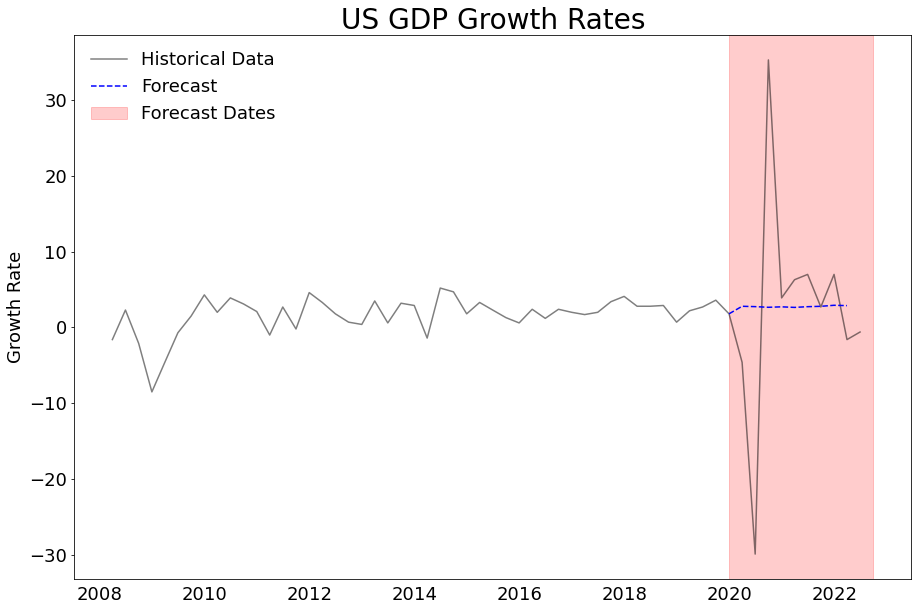

In [122]:
# create an object containing the values of the dates corresponding to each quarter from the fourth quarter of 2019 to the first quarter of 2022
future_dates = pd.date_range('2019-12-31', periods=10, freq='Q')

# create a plot of the historical GDP growth rates along with the forecasted values
fig, ax = plt.subplots(figsize=(15,10))

# start historical data line at 2007-12-31
hist_date = merged_data[merged_data.index > '2007-12-31'].index
hist_gdp = merged_data[merged_data.index > '2007-12-31'].gdp

ax.plot(hist_date, hist_gdp, color='black', alpha = 0.5, label = 'Historical Data')
ax.plot(future_dates, forecast_list, color = 'blue', linestyle = '--', label = 'Forecast')
ax.axvspan('2019-12-31','2022-09-30', color = 'red', alpha = 0.2, label = 'Forecast Dates')

# Make it look nice
ax.set_ylabel('Growth Rate',size=18)
ax.set_title('US GDP Growth Rates',size=28)
ax.xaxis.set_ticks_position('none')
plt.yticks(size=18)
plt.xticks(size=18)
ax.legend(frameon=False,fontsize=18)

plt.show()